In [1]:
#Artigos publicados pela UNICAMP de 2011 a 2019
#260 document results
#AF-ID ( "Universidade Estadual de Campinas"   60029570 )  AND  SUBJAREA ( engi )  AND  ( LIMIT-TO ( PUBYEAR ,  2019 )  OR  LIMIT-TO ( PUBYEAR ,  2018 )  OR  LIMIT-TO ( PUBYEAR ,  2017 )  OR  LIMIT-TO ( PUBYEAR ,  2016 )  OR  LIMIT-TO ( PUBYEAR ,  2015 )  OR  LIMIT-TO ( PUBYEAR ,  2014 )  OR  LIMIT-TO ( PUBYEAR ,  2013 )  OR  LIMIT-TO ( PUBYEAR ,  2012 )  OR  LIMIT-TO ( PUBYEAR ,  2011 ) ) 
#Adaptado de https://www.kaggle.com/ajaymanwani/hottest-topics-in-machine-learning-using-nips-data

# Importing modules
import pandas as pd
import os



## Carregando os artigos

In [3]:

# Read datasets/papers.csv into papers
papers = pd.read_csv('scopus_UNICAMP_2011_2019_qtd6353.csv', error_bad_lines=False)
# Print out the first rows of papers
print(papers.head())

                                             Authors  ...                 EID
0  Hasan, M.M., Mohsin, A., Imani, M., Bittencour...  ...  2-s2.0-85099353136
1  Cabral, T.D., Da Silva, L.E., Fujiwara, E., Ng...  ...  2-s2.0-85077157074
2  Lopez, J.D., Dante, A., Bacurau, R.M., Cremone...  ...  2-s2.0-85077236911
3  Da Silva, R.P.B., Quadros, R., Shaker, H.R., D...  ...  2-s2.0-85076944541
4      Rodriguez, F., Rothenberg, C.E., Pongrácz, G.  ...  2-s2.0-85077959040

[5 rows x 19 columns]


b'Skipping line 3767: expected 19 fields, saw 20\nSkipping line 3768: expected 19 fields, saw 20\nSkipping line 3769: expected 19 fields, saw 20\nSkipping line 3770: expected 19 fields, saw 20\nSkipping line 3771: expected 19 fields, saw 20\n'


In [4]:
papers.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Document Type', 'Publication Stage', 'Open Access',
       'Source', 'EID'],
      dtype='object')

## Preparando os dados para análise

In [5]:
# Remove the columns
papers.drop(['Authors', 'Author(s) ID','Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Publication Stage', 'Open Access', 'EID'], axis=1, inplace=True)

# Print out the first rows of papers
papers.head()

,Title,Year,Source title,Document Type,Source
0,A novel method to predict water quality resili...,2019,ICIET 2019 - 2nd International Conference on I...,Conference Paper,Scopus
1,Reusable polymer optical fiber strain sensor w...,2019,Applied Optics,Article,Scopus
2,Fiber-Optic Current Sensor Based on FBG and Op...,2019,IEEE Photonics Technology Letters,Article,Scopus
3,Analysis of the electrical quantities measured...,2019,Energies,Article,Scopus
4,In-network P4-based low latency robot arm control,2019,CoNEXT 2019 Companion - Proceedings of the 15t...,Conference Paper,Scopus


## Plotar como a pesquisa em Engenharia evoluiu de 2011 a 2019 

In [6]:
papers.columns

Index(['Title', 'Year', 'Source title', 'Document Type', 'Source'], dtype='object')

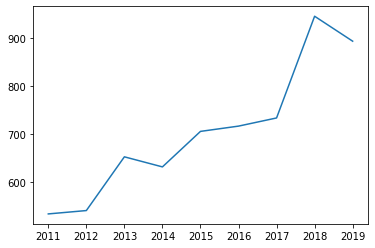

In [7]:
# Group the papers by year
groups = papers.groupby(['Year'])

# Determine the size of each group
counts = groups.size()

# Visualise the counts as a bar plot
import matplotlib.pyplot
%matplotlib inline
matplotlib.pyplot.plot(counts)

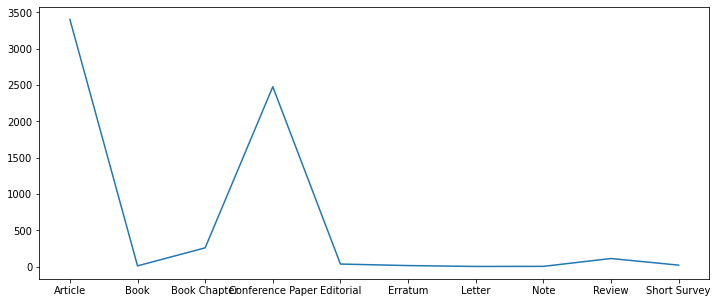

In [8]:
# Group the papers by year
groups = papers.groupby(['Document Type'])

# Determine the size of each group
counts = groups.size()

# Visualise the counts as a bar plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,5))
plt.plot(counts) ## This is your plot
plt.show()


In [9]:
# Group the papers by source
groups = papers.groupby(['Source title']).size()
sorted_groups = groups.sort_values(ascending=False).head(10)

sorted_groups


Source title
Proceedings of SPIE - The International Society for Optical Engineering               99
Optics InfoBase Conference Papers                                                     89
Materials Science and Engineering C                                                   77
Materials Research                                                                    76
IEEE Latin America Transactions                                                       73
European Physical Journal C                                                           72
Journal of the Brazilian Society of Mechanical Sciences and Engineering               69
SBMO/IEEE MTT-S International Microwave and Optoelectronics Conference Proceedings    66
Analytical Methods                                                                    58
Journal of Alloys and Compounds                                                       57
dtype: int64

## Pre-processamento do titulos de cada artigo

In [10]:
# Load the regular expression library
import re

# Print the titles of the first rows 
print(papers['Title'].head())

# Remove punctuation
papers['title_processed'] = papers['Title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())

# Print the processed titles of the first rows 
print(papers.head())

0    A novel method to predict water quality resili...
1    Reusable polymer optical fiber strain sensor w...
2    Fiber-Optic Current Sensor Based on FBG and Op...
3    Analysis of the electrical quantities measured...
4    In-network P4-based low latency robot arm control
Name: Title, dtype: object
                                               Title  ...                                    title_processed
0  A novel method to predict water quality resili...  ...  a novel method to predict water quality resili...
1  Reusable polymer optical fiber strain sensor w...  ...  reusable polymer optical fiber strain sensor w...
2  Fiber-Optic Current Sensor Based on FBG and Op...  ...  fiber-optic current sensor based on fbg and op...
3  Analysis of the electrical quantities measured...  ...  analysis of the electrical quantities measured...
4  In-network P4-based low latency robot arm control  ...  in-network p4-based low latency robot arm control

[5 rows x 6 columns]


In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Nuvem de palavras das pesquisas

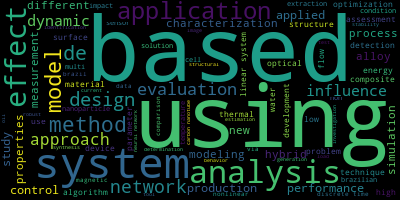

In [12]:
# Import the wordcloud library
import wordcloud

stop = set(stopwords.words('english'))

# Join the different processed titles together.
long_string = ' '.join(papers['title_processed'])

# Create a WordCloud object
wordcloud = wordcloud.WordCloud(stopwords=stop)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Preparar o texto para a análise via LDA - Tópicos

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


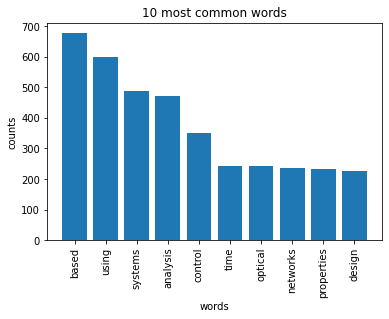

In [13]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## Analisar as tendencias com LDA

In [14]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
study based networks sensor oil using water fiber systems analysis

Topic #1:
al alloys microstructure effects flow simulation solidified application separation sn

Topic #2:
using based steel tool surface friction method milling analysis modeling

Topic #3:
based optical power networks control network grid generation energy using

Topic #4:
systems control time linear feedback discrete state energy using design

Topic #5:
process collisions tev pb using production effects phase proton transfer

Topic #6:
based analysis carbon systems structures method high nanotubes low using

Topic #7:
using analysis transmission based fiber model performance sensor optical evaluation

Topic #8:
properties effect oxide nanoparticles magnetic graphene based mechanical ti composites

Topic #9:
properties mechanical based behavior evaluation acid self chemical 3d chitosan


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# ***Análise*** a partir das revistas em que os artigos foram publicados***

## Pre-processamento do nome das revistas de cada artigo

In [16]:
# Load the regular expression library
import re

# Print the titles of the first rows 
print(papers['Source title'].head())

# Remove punctuation
papers['title_processed'] = papers['Source title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())

# Print the processed titles of the first rows 
print(papers.head())

0    ICIET 2019 - 2nd International Conference on I...
1                                       Applied Optics
2                    IEEE Photonics Technology Letters
3                                             Energies
4    CoNEXT 2019 Companion - Proceedings of the 15t...
Name: Source title, dtype: object
                                               Title  ...                                    title_processed
0  A novel method to predict water quality resili...  ...  iciet 2019 - 2nd international conference on i...
1  Reusable polymer optical fiber strain sensor w...  ...                                     applied optics
2  Fiber-Optic Current Sensor Based on FBG and Op...  ...                  ieee photonics technology letters
3  Analysis of the electrical quantities measured...  ...                                           energies
4  In-network P4-based low latency robot arm control  ...  conext 2019 companion - proceedings of the 15t...

[5 rows x 6 columns]


## Nuvem de palavras sobre as revistas

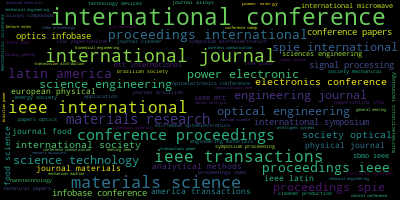

In [17]:
# Import the wordcloud library
import wordcloud

stop = set(stopwords.words('english'))

# Join the different processed titles together.
long_string = ' '.join(papers['title_processed'])

# Create a WordCloud object
wordcloud = wordcloud.WordCloud(stopwords=stop)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Preparar o nome das revistas para análise via LDA

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


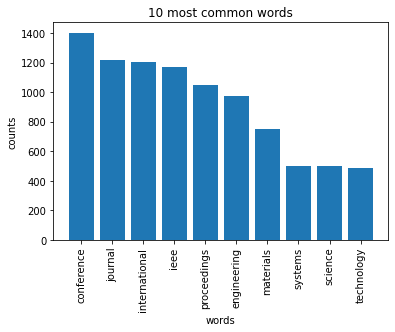

In [18]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## Analisar Tendencias de revistas com LDA

In [20]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
ieee conference mechanics letters journal 2011 international proceedings compounds offshore

Topic #1:
applications technology proceedings journal international advanced ifmbe manufacturing symposium design

Topic #2:
engineering materials journal science mechanical applied optics sciences conference biomedical

Topic #3:
systems 2017 energy international journal engineering control electrical conference circuits

Topic #4:
proceedings international conference engineering optical 2014 ieee society ifac microwave

Topic #5:
materials research journal power design society systems production processing advanced

Topic #6:
journal food technology science methods engineering international nanotechnology chemical sensors

Topic #7:
conference international ieee electronics proceedings 2019 power communications control 2016

Topic #8:
ieee transactions conference latin america proceedings processing 2019 signal communications

Topic #9:
european conference 201

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
